## Making a Synthetic Light Curve
Following the example on the Phoebe website!
http://phoebe-project.org/docs/2.4/examples/minimal_synthetic

Christopoulou light curve to compare to group's. Try to model a simplified system with high / low mass ratios with no inclination to build intuition.

https://raw.githubusercontent.com/WenhanGuo/contact-binaries/master/phoebe_flow.md

In [1]:
#imports and initialize loggers (class that code will call on?)
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

logger = phoebe.logger()

b = phoebe.default_binary(contact_binary=True) #this sets to the default data, and can add "contact_binary=True" but not necessary
b.add_dataset('lc', times=np.linspace(6589.5,6590.5,200), dataset='mylc') #adding time for LC
#overwrite
#b.add_dataset(phoebe.dataset.orb, times=np.linspace(0,10,20), dataset='orb01', component=['primary', 'secondary'])
#now we want to find a way to convert the epochs / have it start at a certain time

PHOEBE: passband "Bolometric:900-40000" has a newer version available.  Run phoebe.list_passband_online_history("Bolometric:900-40000") to get a list of available changes and phoebe.update_passband("Bolometric:900-40000") or phoebe.update_all_passbands() to update.
PHOEBE: passband "Johnson:V" has a newer version available.  Run phoebe.list_passband_online_history("Johnson:V") to get a list of available changes and phoebe.update_passband("Johnson:V") or phoebe.update_all_passbands() to update.


<ParameterSet: 80 parameters | contexts: compute, constraint, dataset, figure>

In [49]:
#print(b.contexts)
context = 'system'
print(b.filter(context=context).qualifiers)
#print(b.filter(context=context).filter(qualifier='teff'))
print(b.get_parameter(qualifier='teffratio',component='binary', context='component').constrained_by)

['t0', 'ra', 'dec', 'distance', 'vgamma', 'ebv', 'Av', 'Rv', 'hierarchy']
[<Parameter: teff=6000.0 K | keys: description, value, quantity, default_unit, limits, visible_if, copy_for, readonly, advanced, latexfmt>, <Parameter: teff=6000.0 K | keys: description, value, quantity, default_unit, limits, visible_if, copy_for, readonly, advanced, latexfmt>]


In [42]:
#alternative way to set parameters
#from https://colab.research.google.com/github/phoebe-project/phoebe2-docs/blob/2.4/tutorials/LC_estimators.ipynb#scrollTo=vG1ehxD5qF8B

# set parameter values
b.set_value('q', value = 0.11) # -- USE THIS
b.set_value('incl', component='binary', value = 89.6) # -- USE THIS
# b.set_value(qualifier='requiv', component='primary', context='component', value=0.594)
# b.set_value(qualifier='requiv', component='secondary', context='component', value=0.237)

#print(b['mass@primary@component'])

print(b.get_parameter(qualifier='requiv', component='primary', context='component').constrained_by)

items = [
    ("requiv","primary","component"),
    ("requiv","secondary","component"),
    ("teff","primary","component"),
    ("teff","secondary","component"),
    ("incl","binary","component"),
    ("per0","binary","component"),
    ("teffratio","binary","component"),
    ("q","binary","component"),
    ("incl","binary","component"),
    ("period","binary","component"),
    ("mass","primary","component")
         ]

visited = []
need_to_visit = []

def list_constraints(p):
    #print (p._qualifier)
    if not p.constrained_by:
        return ""
    c = {}
    for param in p.constrained_by:
        c[f"{param._component} {param._qualifier}: {param._description}"] = (list_constraints(param))
    return c
 

for i in items:
    qual, comp, cont = i[0],i[1],i[2]
    params = b.get_parameter(qualifier=qual, component=comp, context=cont).constrained_by
    print(f"Parameter {qual}@{comp}@{cont} is constrained by:",{p._qualifier:list_constraints(p) for p in params})
    

#flip constraints
#b.flip_constraint('mass@primary', solve_for='period')
b.flip_constraint('pot@primary@component', solve_for='sma')

#print(b.get_parameter(component='primary', context='component').qualifiers)
#requiv@primary@star@component
#b.set_value('ecc', 0.2)
#b.set_value('per0', 63.7)
#b.set_value('requiv', component='primary', value=1.)
#b.set_value('requiv', component='secondary', value=0.6)
#b.set_value('teff', component='primary', value=5742) # -- USE THIS
#b.set_value('teff', component='secondary', value=5600) # -- USE THIS

#compute the model

[]
Parameter requiv@primary@component is constrained by: {}
Parameter requiv@secondary@component is constrained by: {'pot': {'primary requiv: Equivalent radius': '', 'binary q: Mass ratio': '', 'binary sma: Semi-major axis of the orbit (defined at time t0@system)': ''}, 'q': '', 'sma': ''}
Parameter teff@primary@component is constrained by: {}
Parameter teff@secondary@component is constrained by: {}
Parameter incl@binary@component is constrained by: {}
Parameter per0@binary@component is constrained by: {}
Parameter teffratio@binary@component is constrained by: {'teff': ''}
Parameter q@binary@component is constrained by: {}
Parameter incl@binary@component is constrained by: {}
Parameter period@binary@component is constrained by: {'sma': '', 'q': '', 'mass': ''}
Parameter mass@primary@component is constrained by: {}


ValueError: 0 results found for twig: 'pot@primary@component', {'context': 'constraint', 'check_visible': True, 'check_default': True, 'check_advanced': False, 'check_single': False}

In [ ]:
#create an empty LC dataset
#b['period@binary'] = 0.3439788 # period = 0.34 day -- USE THIS
#b['t0_supconj'] = 0.14 # primary eclipse time (zero phase) = 0.14 day -- USE THIS
#b['incl@binary'] = 89.6 # -- USE THIS
#b['ra@system'] = 20 #made up value
#b['Av'] = 0.179

#b['teff@primary'] = 5742 # -- USE THIS
#b['teff@secondary'] = 5600 # -- USE THIS

#b.flip_constraint('mass@primary', solve_for='period') #solve for what now?
#b['mass@primary'] = 1.25

#b['q@binary@orbit@component'] = 0.110 #this bitch has an error
#b['q@binary@orbit@component'] = 0.110 #this bitch has an error
print(b.contexts)
context = 'system'
print(b.filter(context=context).qualifiers)
print(b.filter(context=context).filter(qualifier='Rv'))
print(b.get_parameter(qualifier='mass',component='primary', context='component').constrained_by)
#b['requiv@primary'] = 2
#b['requiv_min@primary@component'] = 0.5
#b['requiv@secondary'] = 0.237

['system', 'component', 'constraint', 'compute', 'figure', 'setting', 'dataset']
['t0', 'ra', 'dec', 'distance', 'vgamma', 'ebv', 'Av', 'Rv', 'hierarchy']
ParameterSet: 1 parameters
                        Rv@system: 3.1
[]


In [ ]:
print(b.run_checks()) # check if run_compute is possible
print(b) # check full parameters; it's already close to Christopolou's values

b.run_compute(model='default')
#b.run_compute(irrad_method='none') #compute synthetics at the time provided by the default options, not sure what they mean by "synthetics" but ok

Run Checks Report: FAIL
ERROR: primary is underflowing at L1 and not a contact system (requiv=1.5, requiv_min=1.9189613231456304, requiv_max=2.0240202338214943) (3 affected parameters, affecting system,run_compute)
ERROR: secondary is overflowing at L2/L3 (requiv=1.4999999999999996, requiv_min=0.7075590040414631, requiv_max=0.8419597771557976) (3 affected parameters, affecting system,run_compute)
ERROR: constraints ['pot@contact_envelope@envelope@constraint'] failed to run.  Address errors and try again.  Call run_failed_constraints to see the tracebacks. (1 affected parameters, affecting system,run_compute)


Wed, 29 Nov 2023 13:08 BUNDLE       WARNING primary is underflowing at L1 and not a contact system (requiv=1.5, requiv_min=1.9189613231456304, requiv_max=2.0240202338214943)  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Wed, 29 Nov 2023 13:08 BUNDLE       WARNING secondary is overflowing at L2/L3 (requiv=1.4999999999999996, requiv_min=0.7075590040414631, requiv_max=0.8419597771557976)  If not addressed, this warning will continue to be raised and will throw an error at run_compute.
Wed, 29 Nov 2023 13:08 BUNDLE       WARNING constraints ['pot@contact_envelope@envelope@constraint'] failed to run.  Address errors and try again.  Call run_failed_constraints to see the tracebacks.  If not addressed, this warning will continue to be raised and will throw an error at run_compute.


PHOEBE Bundle: 184 parameters
                        t0@system: 0.0 d
                        ra@system: 0.0 deg
                       dec@system: 0.0 deg
                  distance@system: 1.0 m
                    vgamma@system: 0.0 km / s
C                      ebv@system: 0.0
                        Av@system: 0.0
                        Rv@system: 3.1
                 hierarchy@system: orbit:binary(star:primary, star:secondary, envelope:contact_envelope)
         requiv@primary@component: 1.5 solRad
C    requiv_max@primary@component: 2.0240202338214943 solRad
C    requiv_min@primary@component: 1.9189613231456304 solRad
           teff@primary@component: 6000.0 K
C          logg@primary@component: 4.345443179972278
        syncpar@primary@component: 1.0
C        period@primary@component: 0.5 d
C          freq@primary@component: 12.56637 rad / d
      gravb_bol@primary@component: 0.32
   irrad_frac_refl_bol@primary...: 0.6
C  irrad_frac_lost_bol@primary...: 0.4
    ld_mode_bol@pri

ValueError: failed to pass checks
Run Checks Report: FAIL
ERROR: primary is underflowing at L1 and not a contact system (requiv=1.5, requiv_min=1.9189613231456304, requiv_max=2.0240202338214943) (3 affected parameters, affecting system,run_compute)
ERROR: secondary is overflowing at L2/L3 (requiv=1.4999999999999996, requiv_min=0.7075590040414631, requiv_max=0.8419597771557976) (3 affected parameters, affecting system,run_compute)
ERROR: constraints ['pot@contact_envelope@envelope@constraint'] failed to run.  Address errors and try again.  Call run_failed_constraints to see the tracebacks. (1 affected parameters, affecting system,run_compute)

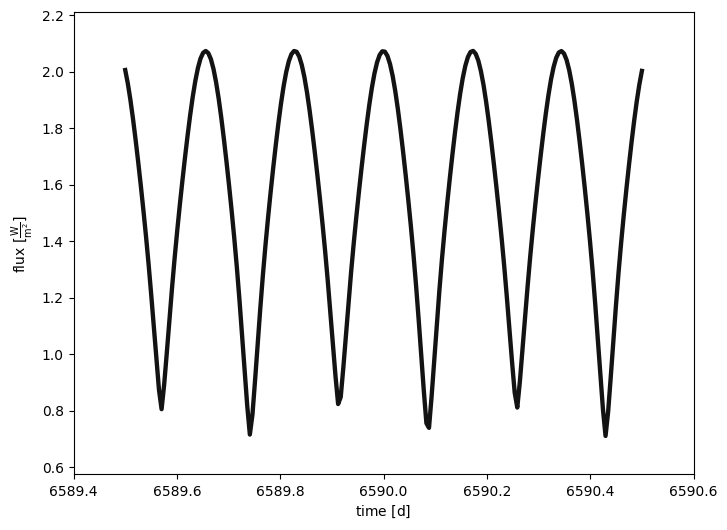

In [ ]:
#plot the LC
afig, mplfig = b['mylc@model'].plot(show=True)

#plotting the flux vs. time

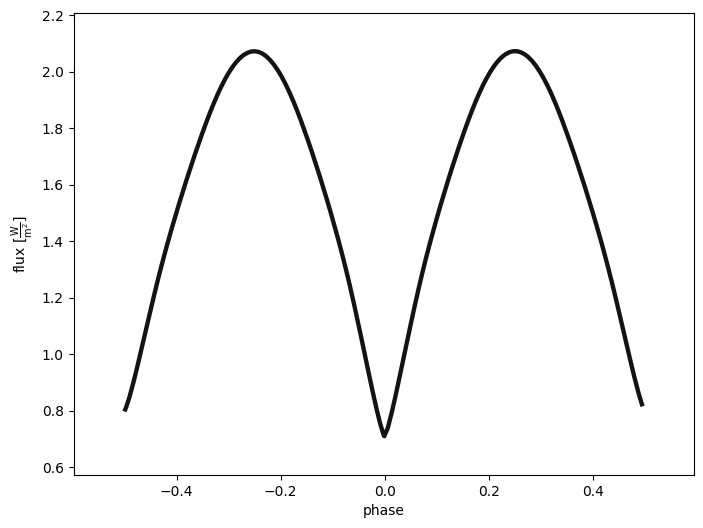

In [ ]:
#phase plot
afig, mplfig = b['mylc@model'].plot(x='phases', show=True)
#how to expand this plot across a wider range?